<a href="https://colab.research.google.com/github/allenjose24/Stock-Price-Prediction-Using-LSTM-A-Data-Driven-Approach-with-Google-Stock-Data/blob/main/Allen_LSTM_GOOG__Stock_Price_Prediction_GOOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                 **Stock Price Prediction Using the TensorFlow**

-----------------------------------------------------------------


##*Importing the basic libraries to load the data*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
GOOG_DATA = pd.read_csv("/content/GOOG.csv")

##Exploratory Data Analysis
Exploratory data analysis (EDA) is **a statistical approach for summarizing the main characteristics of data sets**. It involves using statistical graphics and other data visualization methods to describe the data. The goal of EDA is to explore, investigate, and learn, rather than confirm statistical hypotheses.Exploratory Data Analysis (EDA) is **an analysis approach that identifies general patterns in the data**. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.


*  Data collection
*  Finding all variables and understanding them
*  Cleaning the dataset
*  Visualizing and analyzing results


*For better understanding click on the below link*

> [Exploratory Data Analysis (YouTube) ](https://youtu.be/a4KiExvYJKo?si=N8Sm0C-4ujggL86d)








In [ ]:
type(GOOG_DATA)

pandas.core.frame.DataFrame

In [ ]:
GOOG_DATA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-08-2004,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,20-08-2004,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,23-08-2004,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,24-08-2004,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,25-08-2004,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


###Data prepration for the EDA

In [ ]:
from datetime import datetime

In [ ]:
GOOG_DATA['Date'] = pd.to_datetime(GOOG_DATA['Date']) #, format='%Y-%m-%d'

<ipython-input-6-5a0b443f2350>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  GOOG_DATA['Date'] = pd.to_datetime(GOOG_DATA['Date']) #, format='%Y-%m-%d'


In [ ]:
GOOG_DATA['Date'] = pd.to_datetime(GOOG_DATA['Date'], format='%Y-%m-%d')
GOOG_DATA.set_index(['Date'],drop=False,inplace=True)

In [ ]:
GOOG_DATA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [ ]:
GOOG_DATA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-11-29,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
2023-11-30,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
2023-12-01,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
2023-12-04,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
2023-12-05,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500


In [ ]:
GOOG_DATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4858 entries, 2004-08-19 to 2023-12-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4858 non-null   datetime64[ns]
 1   Open       4858 non-null   float64       
 2   High       4858 non-null   float64       
 3   Low        4858 non-null   float64       
 4   Close      4858 non-null   float64       
 5   Adj Close  4858 non-null   float64       
 6   Volume     4858 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 303.6 KB


##Data Visualization using Plotly, Matplotlib
A candlestick chart is **a financial chart that shows the price movements of a security, derivative, or currency over a given time period**. Each candlestick represents four pieces of information for that day: the open and close in the thick body, and high and low in the "candle wick". Candlestick charts are similar to bar charts.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [ ]:
df = GOOG_DATA
Figure = go.Figure(data=[go.Candlestick(x=df['Date'],
                                        open = df['Open'],
                                        high = df['High'],
                                        low = df['Low'],
                                        close = df['Close'])])
Figure.update_layout(
    autosize=False,
    width = 1400,
    height = 550,
    title = 'Candle Stick Chart of GOOGLE',
    template='plotly'
)

Figure.update_xaxes(title='Date')
Figure.update_yaxes(title='Price')
Figure.show()

##Break Down version of the above Graph Dated[2004-08-19] to [2009-08-19] i.e 5 years


In [ ]:
GOOG = GOOG_DATA.loc['2004-08-19':'2006-08-19'] #5 years gap

In [ ]:
df = GOOG
Figure = go.Figure(data=[go.Candlestick(x=df['Date'],
                                        open = df['Open'],
                                        high = df['High'],
                                        low = df['Low'],
                                        close = df['Close'])])
Figure.update_layout(
    autosize=False,
    width = 1400,
    height = 550,
    title = 'Candle Stick Chart of GOOGLE',
    template='plotly'
)

Figure.update_xaxes(title='Date')
Figure.update_yaxes(title='Price')
Figure.show()

##Effect of the spikes in the volume on the Opening Price of the Stock

Text(0, 0.5, 'Traded Volume')

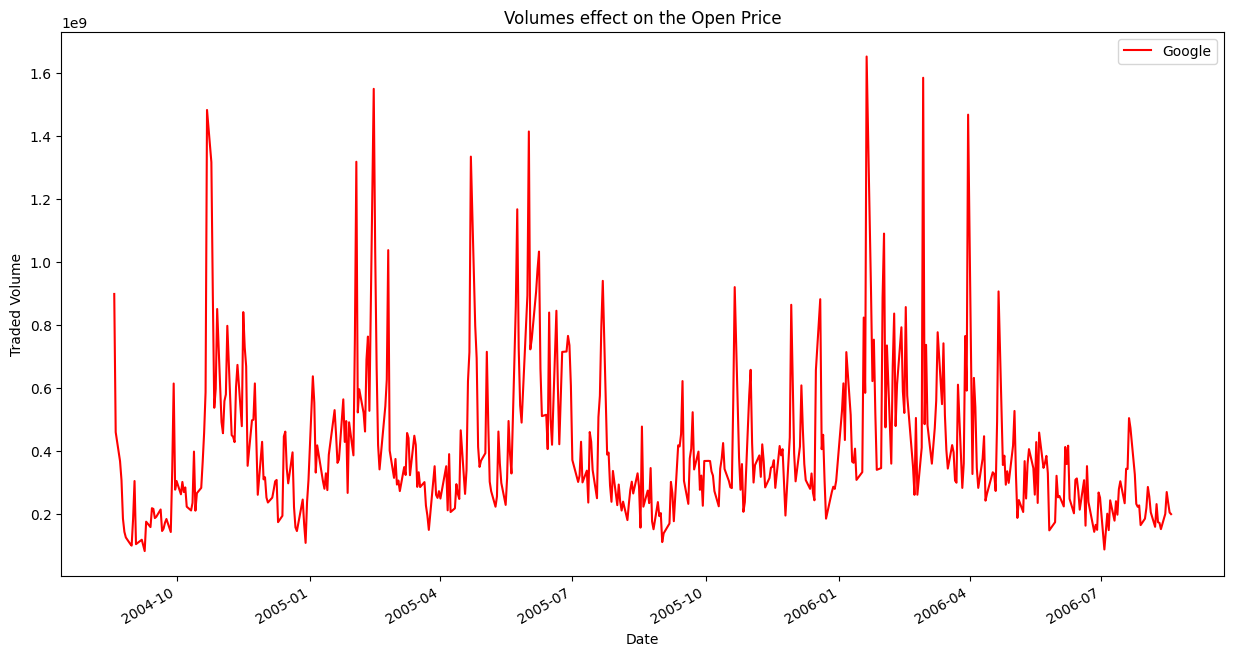

In [ ]:
GOOG['Volume'].plot(label='Google',figsize=(15,8),color='r')
plt.legend()
plt.title('Volumes effect on the Open Price')
plt.xlabel('Date')
plt.ylabel('Traded Volume')

In [ ]:
GOOG.iloc[[GOOG['Volume'].argmax()]]

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2006-01-20,2006-01-20,10.926545,10.95967,9.831649,9.949208,9.949208,1650832619


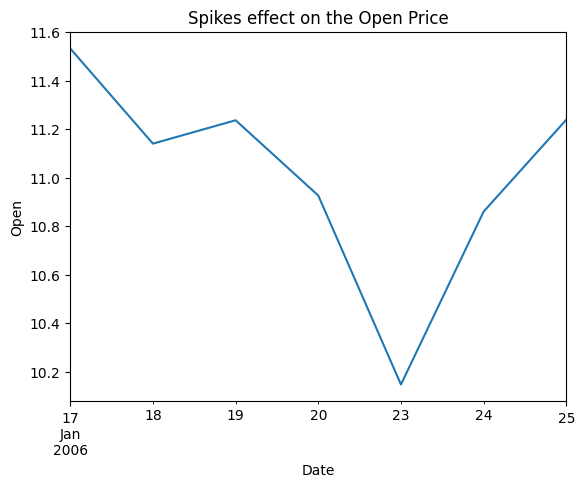

In [ ]:
GOOG.loc['2006-01-15':'2006-01-25']['Open'].plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Spikes effect on the Open Price')
plt.show()

##Finding when the stock was the most valuable in the given time period (5 years)
###What is the relationship between open interest and volume?
Volume refers to the number of trades completed each day and is an important measure of strength and interest in a particular trade. Open interest reflects the number of contracts held by traders in active positions, ready to be traded.

In [ ]:
GOOG['Total Traded'] = GOOG['Open'] * GOOG['Volume']

<ipython-input-18-1ead9fe29ea5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,,
2004-08-19,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2.235190e+09
2004-08-20,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,1.154403e+09
2004-08-23,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,1.011945e+09
2004-08-24,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8.489058e+08
2004-08-25,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,4.827005e+08


Text(0, 0.5, 'Total Traded')

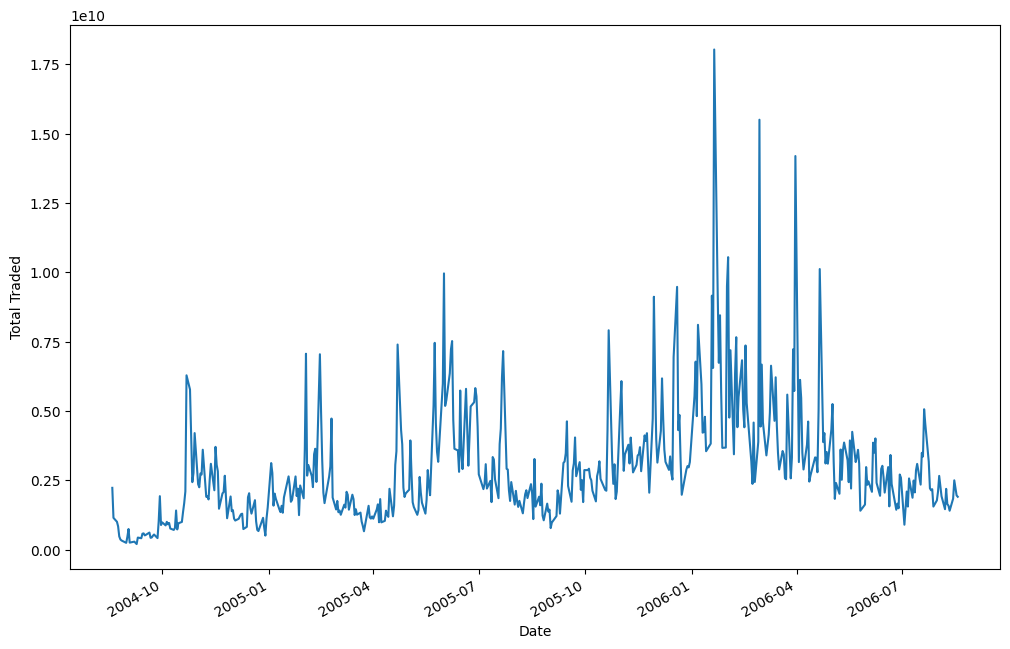

In [ ]:
GOOG['Total Traded'].plot(label='Google',figsize=(12,8));
plt.xlabel('Date')
plt.ylabel('Total Traded')

In [ ]:
GOOG.iloc[[GOOG['Total Traded'].argmax()]]

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,,
2006-01-20,2006-01-20,10.926545,10.95967,9.831649,9.949208,9.949208,1650832619,1.803790e+10


##Calculating the Daily Return
Daily return, in the context of stock prices, refers to the percentage change in a stock's price from one day's closing price to the previous day's closing price. It's a metric used to gauge the stock's performance over a short-term period (one day).

In [ ]:
GOOG['Returns'] = (GOOG['Close']/GOOG['Close'].shift(1))-1

<ipython-input-22-f032ee0783ec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,Returns
Date,,,,,,,,,
2004-08-19,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2.235190e+09,NaN
2004-08-20,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,1.154403e+09,0.079430
2004-08-23,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,1.011945e+09,0.010064
2004-08-24,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8.489058e+08,-0.041408
2004-08-25,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,4.827005e+08,0.010775


In [ ]:
GOOG.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,Returns
Date,,,,,,,,,
2006-08-14,2006-08-14,9.252818,9.343229,9.182332,9.201261,9.201261,199476896,1.845723e+09,0.002524
2006-08-15,2006-08-15,9.317825,9.506119,9.280215,9.488684,9.488684,268932260,2.505864e+09,0.031237
2006-08-16,2006-08-16,9.551200,9.674986,9.517327,9.656804,9.656804,235005569,2.244585e+09,0.017718
2006-08-17,2006-08-17,9.623678,9.713591,9.562159,9.608983,9.608983,203969673,1.962938e+09,-0.004952
2006-08-18,2006-08-18,9.621686,9.641113,9.483205,9.548211,9.548211,198830482,1.913084e+09,-0.006324


Text(0, 0.5, 'Returns')

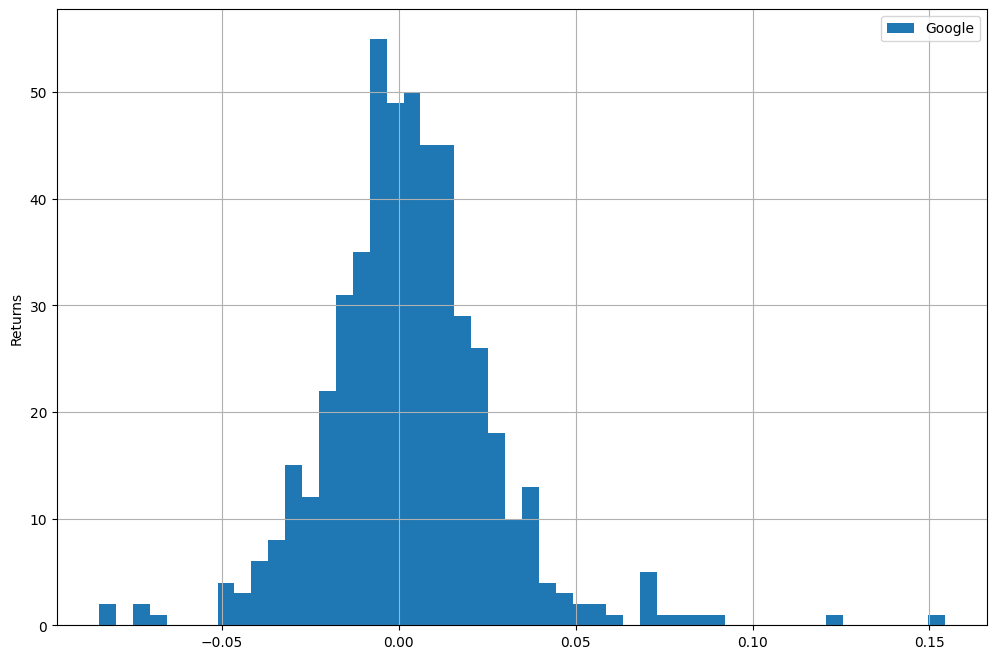

In [ ]:
GOOG['Returns'].hist(bins=50,label='Google',alpha=1,figsize=(12,8))
plt.legend()
plt.ylabel('Returns')

##How much does one get in return for investing one dollar in the stock on any specified date.

In [ ]:
GOOG['C_Return'] = (1+GOOG['Returns']).cumprod()

<ipython-input-26-0ba7f265f59e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
GOOG['C_Return']

Date
2004-08-19         NaN
2004-08-20    1.079430
2004-08-23    1.090293
2004-08-24    1.045146
2004-08-25    1.056408
                ...   
2006-08-14    3.681781
2006-08-15    3.796790
2006-08-16    3.864062
2006-08-17    3.844927
2006-08-18    3.820609
Name: C_Return, Length: 505, dtype: float64

In [ ]:
GOOG['C_Return'].tail(1)

Date
2006-08-18    3.820609
Name: C_Return, dtype: float64

##Data Preprocessing

Data preprocessing in Machine Learning refers to **the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.**

In [ ]:
GOOG_DATA.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4858,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,2014-04-12 02:30:17.044051200,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
min,2004-08-19 00:00:00,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,2009-06-16 06:00:00,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,2014-04-12 12:00:00,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,2019-02-07 18:00:00,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,2023-12-05 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09
std,NaN,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08


In [ ]:
GOOG_DATA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
GOOG_DATA.shape

(4858, 7)

##Feature Engineering

Feature Engineering is **the process of creating new features or transforming existing features to improve the performance of a machine-learning model**. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model. *The goal is to improve model accuracy by providing more meaningful and relevant information*.

In [ ]:
Close = GOOG_DATA['Close'].values.reshape(-1, 1)
Volume = GOOG_DATA['Volume'].values.reshape(-1, 1)
High = GOOG_DATA['High'].values.reshape(-1, 1)
Low =  GOOG_DATA['Low'].values.reshape(-1, 1)

In [ ]:
DataFramE = np.concatenate((Close, Volume, High, Low), axis=1)

In [ ]:
type(DataFramE)

numpy.ndarray

##Data Scaling

This means that you're **transforming your data so that it fits within a specific scale, like 0-100 or 0-1**. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN).

**In this case LSTM and the scale required is 0-1**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling data
scalers = []
for i in range(DataFramE.shape[1]):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_feature = scaler.fit_transform(DataFramE[:, i].reshape(-1, 1))
    scalers.append(scaler)
    DataFramE[:, i] = scaled_feature.flatten()

##Spliting the Data Set

Data splitting is commonly used in machine learning **to split data into a train, test, or validation set**. This approach allows us to find the model hyper-parameter and also estimate the generalization performance.

In [ ]:
# Split data into train and test sets
training_size = int(len(DataFramE) * 0.7)
train_data, test_data = DataFramE[:training_size], DataFramE[training_size:]

In [ ]:
def prepare_data(data, n_steps):
    X, Y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, 0]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)

In [ ]:
n_steps = 60
X_train, Y_train = prepare_data(train_data, n_steps)
X_test, Y_test = prepare_data(test_data, n_steps)

##Model Definig, Compiling and Training

Model compilation is **an activity performed after writing the statements in a model and before training starts**. It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metrics. A compiled model is needed for training but not necessary for predicting.

What is Model Training?

Model training is the phase in the **data science development lifecycle where practitioners try to fit the best combination of weights and bias to a machine learning algorithm to minimize a loss function over the prediction range**.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import time

In [ ]:
# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
Start = time.time()
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64, verbose=1)
End = time.time()

Epoch 1/10
53/53 [==============================] - 16s 163ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/10
53/53 [==============================] - 7s 130ms/step - loss: 9.3500e-05 - val_loss: 0.0010
Epoch 3/10
53/53 [==============================] - 8s 149ms/step - loss: 7.7953e-05 - val_loss: 0.0011
Epoch 4/10
53/53 [==============================] - 7s 129ms/step - loss: 7.9666e-05 - val_loss: 0.0012
Epoch 5/10
53/53 [==============================] - 8s 150ms/step - loss: 6.9548e-05 - val_loss: 0.0021
Epoch 6/10
53/53 [==============================] - 7s 128ms/step - loss: 7.0731e-05 - val_loss: 0.0037
Epoch 7/10
53/53 [==============================] - 7s 135ms/step - loss: 7.4414e-05 - val_loss: 0.0021
Epoch 8/10
53/53 [==============================] - 8s 151ms/step - loss: 7.1472e-05 - val_loss: 0.0024
Epoch 9/10
53/53 [==============================] - 7s 129ms/step - loss: 6.2728e-05 - val_loss: 0.0028
Epoch 10/10
53/53 [==============================] - 7s 141ms/step 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51451 (200.98 KB)
Trainable params: 51451 

In [ ]:
#calculating the training time
print(f"Training time: {End-Start}s")

Training time: 88.3807122707367s


In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

44/44 [==============================] - 1s 24ms/step


In [ ]:
# Inverse transform predictions
train_predict = scalers[0].inverse_transform(train_predict)
test_predict = scalers[0].inverse_transform(test_predict)

In [ ]:
# Inverse transform Y_train and Y_test
Y_train_inv = scalers[0].inverse_transform(Y_train.reshape(-1, 1))
Y_test_inv = scalers[0].inverse_transform(Y_test.reshape(-1, 1))

##Root Mean Square Error

The Root Mean Squared Error (RMSE) is **one of the two main performance indicators for a regression model**. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(Y_train_inv, train_predict))
rmse_test = np.sqrt(mean_squared_error(Y_test_inv, test_predict))

In [ ]:
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 1.0060066084287729
Test RMSE: 9.793869487052927


In [ ]:
# Create a Plotly figure
fig_rmse = go.Figure()

# Add traces for train RMSE and test RMSE
fig_rmse.add_trace(go.Bar(x=['Train'], y=[rmse_train], name='Train RMSE', marker_color='blue'))
fig_rmse.add_trace(go.Bar(x=['Test'], y=[rmse_test], name='Test RMSE', marker_color='red'))

# Update layout
fig_rmse.update_layout(title='Root Mean Squared Error (RMSE)',
                       xaxis_title='Dataset',
                       yaxis_title='RMSE',
                       template='plotly_dark')

# Show the figure
fig_rmse.show()


##Visulatization of the values using the Plotly liberary

In [ ]:
import plotly.graph_objects as go

# Plot loss history
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=np.arange(len(history.history['loss'])), y=history.history['loss'], mode='lines', name='Train Loss'))
fig_loss.add_trace(go.Scatter(x=np.arange(len(history.history['val_loss'])), y=history.history['val_loss'], mode='lines', name='Test Loss'))
fig_loss.update_layout(title='Training and Test Loss',
                       xaxis_title='Epoch',
                       yaxis_title='Loss',
                       template='plotly_dark')
fig_loss.show()

# Plot actual vs predicted for train data
fig_train = go.Figure()
fig_train.add_trace(go.Scatter(x=np.arange(len(Y_train_inv)), y=Y_train_inv[:, 0], mode='lines', name='Actual Train'))
fig_train.add_trace(go.Scatter(x=np.arange(len(train_predict)), y=train_predict[:, 0], mode='lines', name='Predicted Train'))
fig_train.update_layout(title='Actual vs Predicted Stock Prices for Train Data',
                        xaxis_title='Time',
                        yaxis_title='Price',
                        template='plotly_dark')
fig_train.show()

# Plot actual vs predicted for test data
fig_test = go.Figure()
fig_test.add_trace(go.Scatter(x=np.arange(len(Y_test_inv)), y=Y_test_inv[:, 0], mode='lines', name='Actual Test'))
fig_test.add_trace(go.Scatter(x=np.arange(len(train_predict), len(train_predict) + len(test_predict)), y=test_predict[:, 0], mode='lines', name='Predicted Test'))
fig_test.update_layout(title='Actual vs Predicted Stock Prices for Test Data',
                       xaxis_title='Time',
                       yaxis_title='Price',
                       template='plotly_dark')
fig_test.show()

In [ ]:
import plotly.graph_objects as go

# Define colors
actual_train_color = 'blue'
predicted_train_color = 'yellow'
actual_test_color = 'green'
predicted_test_color = 'red'

# Plotting
fig = go.Figure()

# Actual train and test data
fig.add_trace(go.Scatter(x=np.arange(len(Y_train_inv)), y=Y_train_inv[:, 0], mode='lines', name='Actual Train', line=dict(color=actual_train_color)))
fig.add_trace(go.Scatter(x=np.arange(len(train_predict)), y=train_predict[:, 0], mode='lines', name='Predicted Train', line=dict(color=predicted_train_color)))

fig.add_trace(go.Scatter(x=np.arange(len(Y_test_inv)), y=Y_test_inv[:, 0], mode='lines', name='Actual Test', line=dict(color=actual_test_color)))
fig.add_trace(go.Scatter(x=np.arange(len(train_predict), len(train_predict) + len(test_predict)), y=test_predict[:, 0], mode='lines', name='Predicted Test', line=dict(color=predicted_test_color)))

fig.update_layout(title='Actual vs Predicted Stock Prices',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  template='plotly_dark')

fig.show()
